## 인구별 소득 수준 EDA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr
from scipy.stats import probplot
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
count_by_area = pd.read_csv("medical-facility-location.csv")
count_by_area

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수
0,강남구,81053206.0,10,201,93867
1,서초구,80510746.0,5,141,76176
2,용산구,69795335.0,2,66,27345
3,송파구,55703664.0,4,257,106008
4,성동구,52498140.0,2,114,38125
5,종로구,52233029.0,6,49,17365
6,마포구,51249929.0,1,131,51366
7,중구,49499323.0,3,59,12773
8,양천구,49391500.0,5,101,79006
9,영등포구,47450278.0,6,136,48396


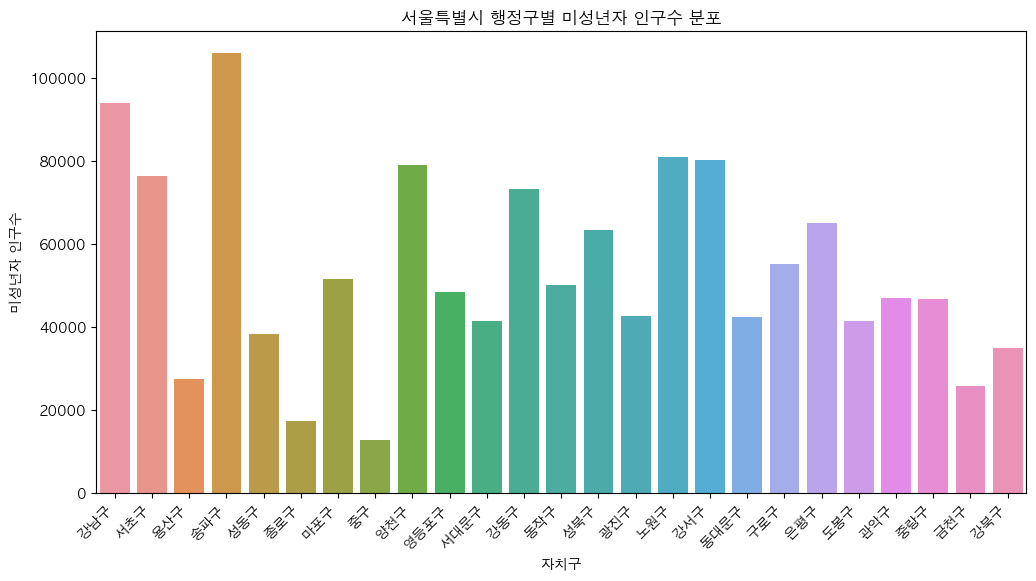

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='미성년자인구수', data=count_by_area)
plt.title('서울특별시 행정구별 미성년자 인구수 분포')
plt.xlabel('자치구')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

## 가설 03: 지역의 미성년자인구수와 소아청소년과 병원의 개수는 관련이 있을 것이다.

In [11]:
count_by_area

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수
0,강남구,81053206.0,10,201,93867
1,서초구,80510746.0,5,141,76176
2,용산구,69795335.0,2,66,27345
3,송파구,55703664.0,4,257,106008
4,성동구,52498140.0,2,114,38125
5,종로구,52233029.0,6,49,17365
6,마포구,51249929.0,1,131,51366
7,중구,49499323.0,3,59,12773
8,양천구,49391500.0,5,101,79006
9,영등포구,47450278.0,6,136,48396


In [12]:
pearsonr(count_by_area['미성년자인구수'], count_by_area['소아청소년과 병원 수'])

PearsonRResult(statistic=0.4858171857753344, pvalue=0.013813949087772295)

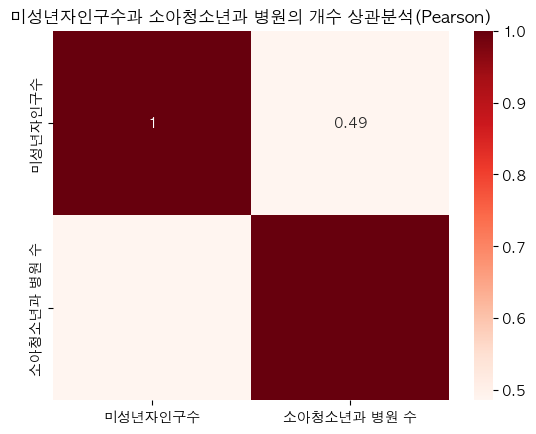

In [13]:
sns.heatmap(count_by_area[['미성년자인구수', '소아청소년과 병원 수']].corr( method='pearson'), annot=True, cmap='Reds')
plt.title('미성년자인구수과 소아청소년과 병원의 개수 상관분석(Pearson)')
plt.show()

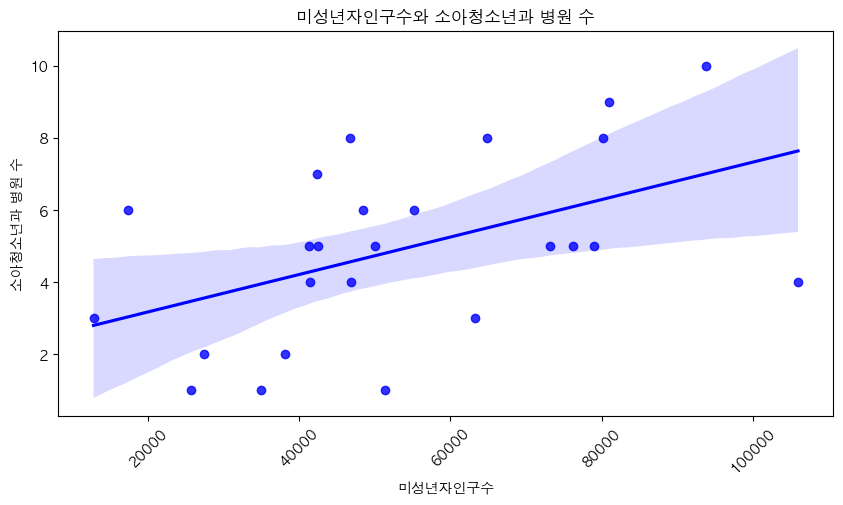

In [14]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=count_by_area['미성년자인구수'], y='소아청소년과 병원 수', color='blue')
plt.xticks(rotation=45)
plt.xlabel('미성년자인구수')
plt.title('미성년자인구수와 소아청소년과 병원 수')

plt.show()

### 가설 검정 03 결론: 지역의 미성년자인구수와 소아청소년과 병원의 수는 약한 상관관계가 있다. <br />
pearson 상관 계수 결과 p-value 0.014, statistic 0.49로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 찾지 못했다.

## 가설 04: 지역의 소득 수준과 소아청소년과 의원의 개수는 관련이 있을 것이다.

In [16]:
pearsonr(count_by_area['미성년자인구수'], count_by_area['소아청소년과 의원 수'])

PearsonRResult(statistic=0.8055698161796324, pvalue=1.1833922624329612e-06)

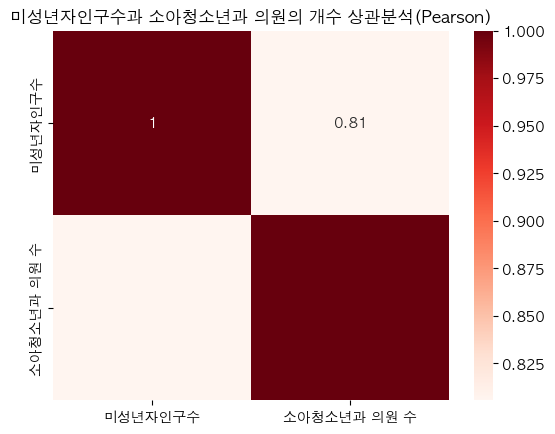

In [17]:
sns.heatmap(count_by_area[['미성년자인구수', '소아청소년과 의원 수']].corr( method='pearson'), annot=True, cmap='Reds')
plt.title('미성년자인구수과 소아청소년과 의원의 개수 상관분석(Pearson)')
plt.show()

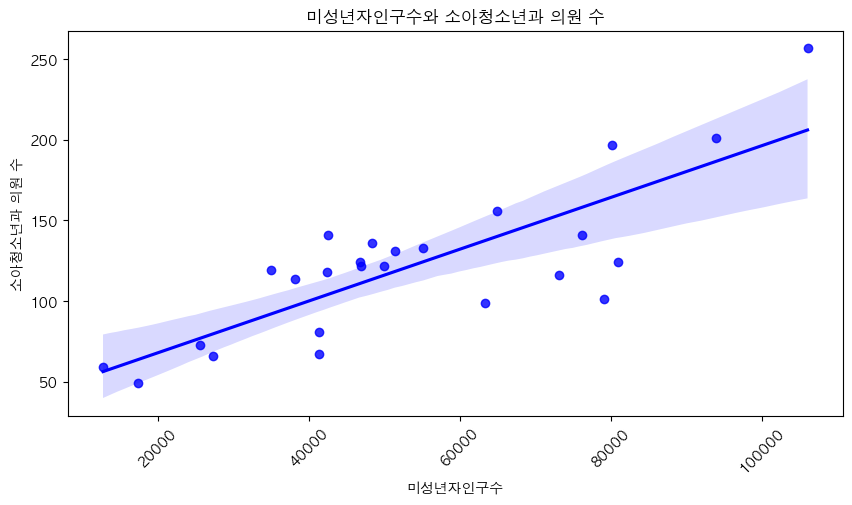

In [18]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=count_by_area['미성년자인구수'], y='소아청소년과 의원 수', color='blue')
plt.xticks(rotation=45)
plt.xlabel('미성년자인구수')
plt.title('미성년자인구수와 소아청소년과 의원 수')

plt.show()

### 가설 검정 04 결론: 지역의 미성년자인구수와 소아청소년과 의원의 수는 약한 상관관계가 있다. <br />
pearson 상관 계수 결과 p-value 0.000000118, statistic 0.81로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 가진다.